In [1]:
import pandas as pd

# === Load Data ===
client_df = pd.read_csv("client_data.csv")
price_df = pd.read_csv("price_data.csv")

# === Rename columns in client_df ===
client_df.rename(columns={
    "id": "client_id",
    "activity_new": "activity_type",
    "channel_sales": "sales_channel_code",
    "cons_12m": "electricityconsumption_12m",
    "cons_gas_12m": "gas_consumption_12m",
    "cons_last_month": "electricityconsumption_last_month",
    "date_activ": "contract_start_date",
    "date_end": "contract_end_date",
    "date_modif_prod": "last_product_modification_date",
    "date_renewal": "next_renewal_date",
    "forecast_cons_12m": "electricitypredicted_consumption_12m",
    "forecast_cons_year": "electricitypredicted_consumption_calenderyear",
    "forecast_discount_energy": "predicted_value_current_discount",
    "forecast_meter_rent_12m": "predicted_meter_rental_12m",
    "forecast_price_energy_off_peak": "predicted_energy_price_1stperiod",
    "forecast_price_energy_peak": "predicted_energy_price_2ndperiod",
    "forecast_price_pow_off_peak": "predicted_power_price_1stperiod",
    "has_gas": "clienthas_gas_connection",
    "imp_cons": "billed_consumption",
    "margin_gross_pow_ele": "gross_margin_powersubscription",
    "margin_net_pow_ele": "net_margin_powersubscription",
    "nb_prod_act": "active_products_count",
    "net_margin": "total_net_margin",
    "num_years_antig": "years_as_customer",
    "origin_up": "electricity_campaign_code_subscribed",
    "pow_max": "subscribed_power",
    "churn": "is_churned"
}, inplace=True)

# === Rename columns in price_df ===
price_df.rename(columns={
    "id": "client_id",
    "price_date": "price_date",
    "price_off_peak_var": "energy_price_1stperiod",
    "price_peak_var": "energy_price_2ndperiod",
    "price_mid_peak_var": "energy_price_3rdperiod",
    "price_off_peak_fix": "power_price_1stperiod",
    "price_peak_fix": "power_price_2ndperiod",
    "price_mid_peak_fix": "power_price_3rdperiod"
}, inplace=True)

# ✅ Preview updated dataframes
print("Client Data Columns:\n", client_df.columns.tolist())
print("\nPrice Data Columns:\n", price_df.columns.tolist())

Client Data Columns:
 ['client_id', 'sales_channel_code', 'electricityconsumption_12m', 'gas_consumption_12m', 'electricityconsumption_last_month', 'contract_start_date', 'contract_end_date', 'last_product_modification_date', 'next_renewal_date', 'electricitypredicted_consumption_12m', 'electricitypredicted_consumption_calenderyear', 'predicted_value_current_discount', 'predicted_meter_rental_12m', 'predicted_energy_price_1stperiod', 'predicted_energy_price_2ndperiod', 'predicted_power_price_1stperiod', 'clienthas_gas_connection', 'billed_consumption', 'gross_margin_powersubscription', 'net_margin_powersubscription', 'active_products_count', 'total_net_margin', 'years_as_customer', 'electricity_campaign_code_subscribed', 'subscribed_power', 'is_churned']

Price Data Columns:
 ['client_id', 'price_date', 'energy_price_1stperiod', 'energy_price_2ndperiod', 'energy_price_3rdperiod', 'power_price_1stperiod', 'power_price_2ndperiod', 'power_price_3rdperiod']


In [2]:
# === DataFrame Shapes ===
print("Client data shape:", client_df.shape)
print("Price data shape:", price_df.shape)

# === Data Types ===
print("\nClient Data Types:\n", client_df.dtypes)
print("\nPrice Data Types:\n", price_df.dtypes)

# === Missing Values ===
print("\nMissing Values in Client Data:\n", client_df.isnull().sum().sort_values(ascending=False))
print("\nMissing Values in Price Data:\n", price_df.isnull().sum().sort_values(ascending=False))

# === Quick summary of binary churn variable ===
print("\nChurn Value Counts:\n", client_df['is_churned'].value_counts())

Client data shape: (14606, 26)
Price data shape: (193002, 8)

Client Data Types:
 client_id                                         object
sales_channel_code                                object
electricityconsumption_12m                         int64
gas_consumption_12m                                int64
electricityconsumption_last_month                  int64
contract_start_date                               object
contract_end_date                                 object
last_product_modification_date                    object
next_renewal_date                                 object
electricitypredicted_consumption_12m             float64
electricitypredicted_consumption_calenderyear      int64
predicted_value_current_discount                 float64
predicted_meter_rental_12m                       float64
predicted_energy_price_1stperiod                 float64
predicted_energy_price_2ndperiod                 float64
predicted_power_price_1stperiod                  float64
client

In [4]:
# === Convert date columns in client_df ===
date_cols = [
    "contract_start_date", "contract_end_date",
    "last_product_modification_date", "next_renewal_date"
]

for col in date_cols:
    client_df[col] = pd.to_datetime(client_df[col], errors='coerce')

# === Convert price_date in price_df ===
price_df["price_date"] = pd.to_datetime(price_df["price_date"], errors='coerce')

# ✅ Confirm conversion
print(client_df[date_cols].dtypes)
print("\nPrice Data - price_date dtype:", price_df["price_date"].dtype)

contract_start_date               datetime64[ns]
contract_end_date                 datetime64[ns]
last_product_modification_date    datetime64[ns]
next_renewal_date                 datetime64[ns]
dtype: object

Price Data - price_date dtype: datetime64[ns]


In [6]:
client_df['clienthas_gas_connection'] = client_df['clienthas_gas_connection'].map({'t': 1, 'f': 0})

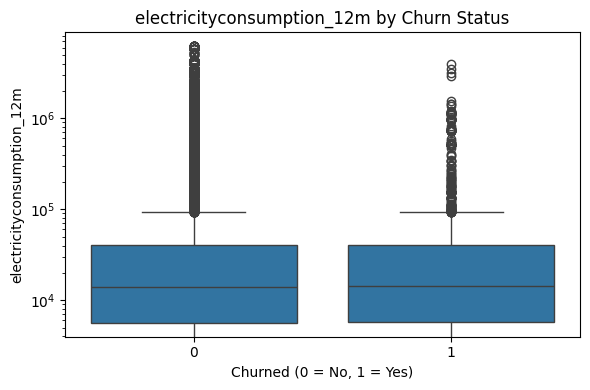

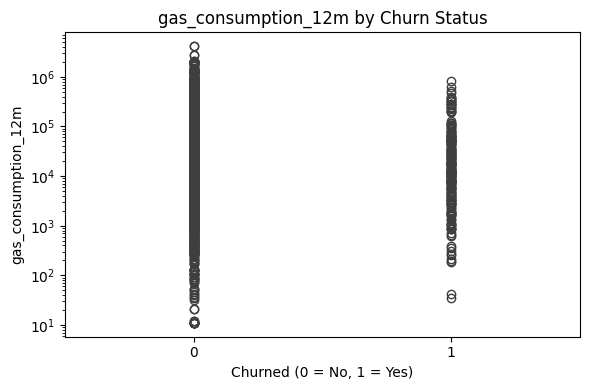

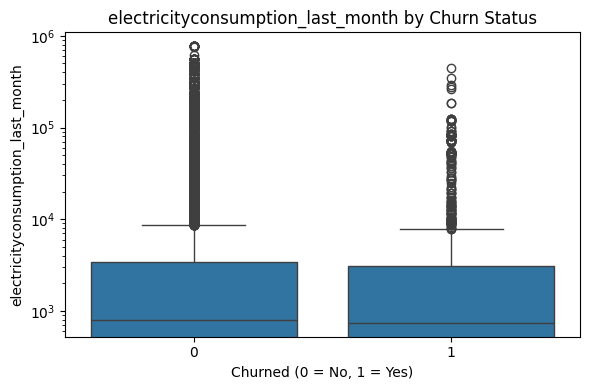

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# === List of consumption columns ===
consumption_cols = [
    "electricityconsumption_12m",
    "gas_consumption_12m",
    "electricityconsumption_last_month"
]

# === Boxplots grouped by churn ===
for col in consumption_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='is_churned', y=col, data=client_df)
    plt.yscale("log")  # log scale to handle extreme skew
    plt.title(f"{col} by Churn Status")
    plt.xlabel("Churned (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [9]:
# Very similar distribution churned vs retained
# suggesting that consumption/volume doesnt strongly differentiate between churners and non-churners
# This strengthens the case to now analyze price sensitivity

In [12]:
# two same columns
client_df.drop(columns='gross_margin_powersubscription', inplace=True)
print("Dropped 'gross_margin_powersubscription'. New shape:", client_df.shape)

Dropped 'gross_margin_powersubscription'. New shape: (14606, 25)


In [15]:
import numpy as np

# Replace 'MISSING' with NaN in sales_channel_code
client_df['sales_channel_code'] = client_df['sales_channel_code'].replace("MISSING", np.nan)

# Confirm change
print(client_df['sales_channel_code'].value_counts(dropna=False))

sales_channel_code
foosdfpfkusacimwkcsosbicdxkicaua    6754
NaN                                 3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64


In [16]:
client_df['sales_channel_code'] = client_df['sales_channel_code'].fillna("missing_category")


In [17]:
client_df.head()

,client_id,sales_channel_code,electricityconsumption_12m,gas_consumption_12m,electricityconsumption_last_month,contract_start_date,contract_end_date,last_product_modification_date,next_renewal_date,electricitypredicted_consumption_12m,...,predicted_power_price_1stperiod,clienthas_gas_connection,billed_consumption,net_margin_powersubscription,active_products_count,total_net_margin,years_as_customer,electricity_campaign_code_subscribed,subscribed_power,is_churned
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,40.606701,1,0.00,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,missing_category,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311378,0,0.00,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.311378,0,0.00,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.311378,0,0.00,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,missing_category,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,40.606701,0,52.32,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
